             product_category  retail_disc
19632             SOFT DRINKS      2847.00
2777                  BERRIES      2347.15
19630             SOFT DRINKS      1855.92
9985      FLUID MILK PRODUCTS      1694.90
12965  ICE CREAM/MILK/SHERBTS      1577.40


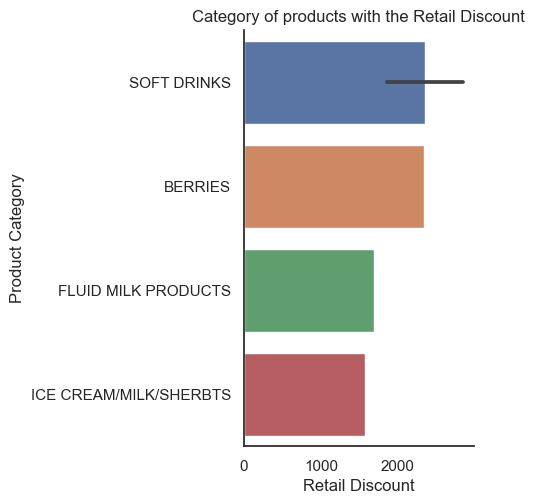

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


from pandas.plotting import scatter_matrix
from completejourney_py import get_data

cj_data = get_data()
cj_data.keys()

cj_data['transactions'].head()
transactions = cj_data['transactions']
demographics = cj_data['demographics']
products = cj_data['products']

promotions = cj_data['promotions']

coupon_redemp =  cj_data['coupon_redemptions']

coupons = cj_data['coupons']

campaign_descriptions = cj_data['campaign_descriptions']

campaigns = cj_data['campaigns']


transactions.columns.intersection(products.columns)
transactions.columns.intersection(demographics.columns)

transactions.columns.intersection(campaigns.columns)
transactions.columns.intersection(demographics.columns)

# 1  -- Total sales for each household and the income range as per the household composition

new_df_2= pd.merge(transactions,demographics,on='household_id')
new_df_2.columns

new_df_2_1 = pd.merge(new_df_2,products,on='product_id')
new_df_2_1.columns

second_gr = new_df_2_1.groupby(['product_category','retail_disc'], as_index=False).agg({'retail_disc': 'sum'}).nlargest(5, 'retail_disc')
print(second_gr)

# sns.relplot(data = second_gr, x = 'retail_disc', y='product_category', col='product_category',col_wrap=6)

#sns.countplot(data=second_gr, x='product_category')

sns.catplot(data = second_gr , y = 'product_category', x= 'retail_disc' , kind='bar')

plt.xlabel('Retail Discount')
plt.ylabel('Product Category')
plt.title('Category of products with the Retail Discount')

plt.show()
